In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistics
from evaluation.classification.statistics import compute_all_size_df, get_precisions
plt.style.use("ggplot")
%matplotlib inline

### --- compare confusion matrix ---

In [2]:
resnet50_not_DCL = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/validation_matrix.csv')
resnet50_DCL = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize_DCL/validation_matrix.csv')

In [3]:
resnet50_not_DCL_precisions = get_precisions(resnet50_not_DCL)
resnet50_DCL_precisions = get_precisions(resnet50_DCL)

In [4]:
exp_name = ["resnet50_not_DCL", "resnet50_DCL"]
exp_ap = [resnet50_not_DCL_precisions.mean(), resnet50_DCL_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50_not_DCL,0.884649
1,resnet50_DCL,0.881157


In [6]:
df_per_label = pd.DataFrame({"resnet50_not_DCL": resnet50_not_DCL_precisions, "resnet50_DCL": resnet50_DCL_precisions})
df_per_label['Name'] = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label

,resnet50_not_DCL,resnet50_DCL,Name
0,0.954654,0.952267,Diptera
1,0.921569,0.882353,Ephemeridae
2,0.765000,0.770000,Ephemeroptera
3,0.874074,0.885185,Lepidoptera
4,0.880597,0.873134,Plecoptera
5,0.912000,0.924000,Trichoptera


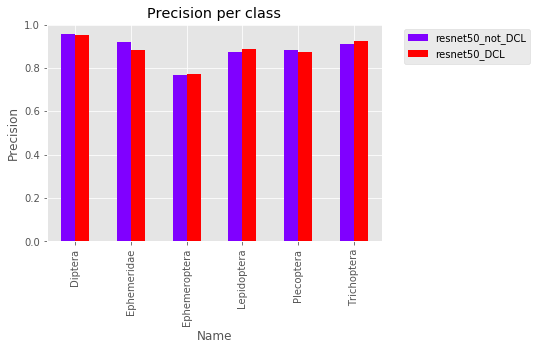

In [8]:
df_per_label.plot(kind="bar", x="Name", y=["resnet50_not_DCL", "resnet50_DCL"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_DCL/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
resnet50_default = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
resnet50_not_DCL = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/each_size_df.csv')
resnet50_DCL = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize_DCL/each_size_df.csv')
new_resnet50_not_DCL = pd.DataFrame({"Accuracy": resnet50_not_DCL["Accuracy"].values, "Insect_size": resnet50_default["Insect_size"].values})
new_resnet50_DCL = pd.DataFrame({"Accuracy": resnet50_DCL["Accuracy"].values, "Insect_size": resnet50_default["Insect_size"].values})
resnet50_not_DCL = compute_all_size_df(new_resnet50_not_DCL)
resnet50_DCL = compute_all_size_df(new_resnet50_DCL)

In [10]:
resnet50_not_DCL = resnet50_not_DCL.drop(resnet50_not_DCL.index[[0]])
resnet50_DCL = resnet50_DCL.drop(resnet50_DCL.index[[0]])

In [11]:
all_df = resnet50_not_DCL
all_df = all_df.rename(columns={'Accuracy': 'resnet50_not_DCL'})
all_df = all_df.assign(resnet50_DCL=resnet50_DCL["Accuracy"])
all_df

,order,resnet50_not_DCL,Insect_size,resnet50_DCL
1,7.0,1.000000,205.833333,0.833333
2,8.0,0.901961,395.039216,0.901961
3,9.0,0.771654,770.850394,0.803150
4,10.0,0.847458,1504.529661,0.813559
5,11.0,0.879310,2941.368966,0.906897
6,12.0,0.932258,5934.145161,0.941935
7,13.0,0.956938,11264.789474,0.937799
8,14.0,0.935897,22344.653846,0.961538
9,15.0,0.900000,34865.400000,0.900000


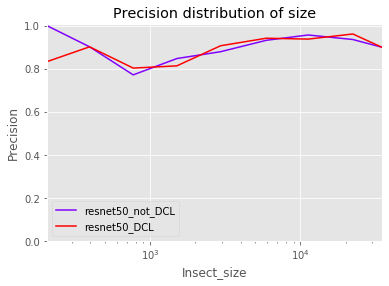

In [12]:
all_df.plot(x="Insect_size", y=["resnet50_not_DCL", "resnet50_DCL"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.title("Precision distribution of size")
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_DCL/compare_precision_distrib_of_size.png", bbox_inches="tight")